In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
memo = [[0]*26 for i in range(26)]
memo[1][1] = 1
memo[2][1] = 1
memo[2][2] = 2
memo[3][1] = 1
memo[3][2] = 2
memo[3][3] = 3

In [50]:
x = 4

while x+1 <= len(memo):
    for i in range(1,x+1):
        if i == 1:
            memo[x][i] = 1
        elif i == x or i == (x-1):
            memo[x][i] = memo[x][i-1] + 1
        else:
            mini = min(x-i,i)
            memo[x][i] = memo[x][i-1] + memo[x-i][mini]
    x += 1

partition_numbers = []
for i in range(1, len(memo)):
    partition_numbers.append([i, memo[i][i]])
print(partition_numbers)

[[1, 1], [2, 2], [3, 3], [4, 5], [5, 7], [6, 11], [7, 15], [8, 22], [9, 30], [10, 42], [11, 56], [12, 77], [13, 101], [14, 135], [15, 176], [16, 231], [17, 297], [18, 385], [19, 490], [20, 627], [21, 792], [22, 1002], [23, 1255], [24, 1575], [25, 1958]]


In [51]:
df_numbers = pd.DataFrame(partition_numbers, columns = ['input', 'output'])
df_numbers.head()

,input,output
0,1,1
1,2,2
2,3,3
3,4,5
4,5,7


In [52]:
memo2 = [[0]*26 for i in range(26)]
for i in range(1, len(memo2)):
    for j in range(1, i+1):
        memo2[i][j] = memo[i][j]-memo[i][j-1]
# for i in range(len(memo2)):
#     print(i, memo2[i])

increments = []
for i in range(len(memo2)):
    for j in range(len(memo2[i])):
        if memo2[i][j] != 0:
            increments.append([i, j, memo2[i][j]])
print(increments)


[[1, 1, 1], [2, 1, 1], [2, 2, 1], [3, 1, 1], [3, 2, 1], [3, 3, 1], [4, 1, 1], [4, 2, 2], [4, 3, 1], [4, 4, 1], [5, 1, 1], [5, 2, 2], [5, 3, 2], [5, 4, 1], [5, 5, 1], [6, 1, 1], [6, 2, 3], [6, 3, 3], [6, 4, 2], [6, 5, 1], [6, 6, 1], [7, 1, 1], [7, 2, 3], [7, 3, 4], [7, 4, 3], [7, 5, 2], [7, 6, 1], [7, 7, 1], [8, 1, 1], [8, 2, 4], [8, 3, 5], [8, 4, 5], [8, 5, 3], [8, 6, 2], [8, 7, 1], [8, 8, 1], [9, 1, 1], [9, 2, 4], [9, 3, 7], [9, 4, 6], [9, 5, 5], [9, 6, 3], [9, 7, 2], [9, 8, 1], [9, 9, 1], [10, 1, 1], [10, 2, 5], [10, 3, 8], [10, 4, 9], [10, 5, 7], [10, 6, 5], [10, 7, 3], [10, 8, 2], [10, 9, 1], [10, 10, 1], [11, 1, 1], [11, 2, 5], [11, 3, 10], [11, 4, 11], [11, 5, 10], [11, 6, 7], [11, 7, 5], [11, 8, 3], [11, 9, 2], [11, 10, 1], [11, 11, 1], [12, 1, 1], [12, 2, 6], [12, 3, 12], [12, 4, 15], [12, 5, 13], [12, 6, 11], [12, 7, 7], [12, 8, 5], [12, 9, 3], [12, 10, 2], [12, 11, 1], [12, 12, 1], [13, 1, 1], [13, 2, 6], [13, 3, 14], [13, 4, 18], [13, 5, 18], [13, 6, 14], [13, 7, 11], [13, 8

Make dataframes to organize my numbers

In [53]:
df_intervals = pd.DataFrame(increments, columns = ['number', 'subpartition', 'increment'])
df_intervals.head()

,number,subpartition,increment
0,1,1,1
1,2,1,1
2,2,2,1
3,3,1,1
4,3,2,1


Look at growth of the first 25 partition numbers

NameError: name 'df1' is not defined

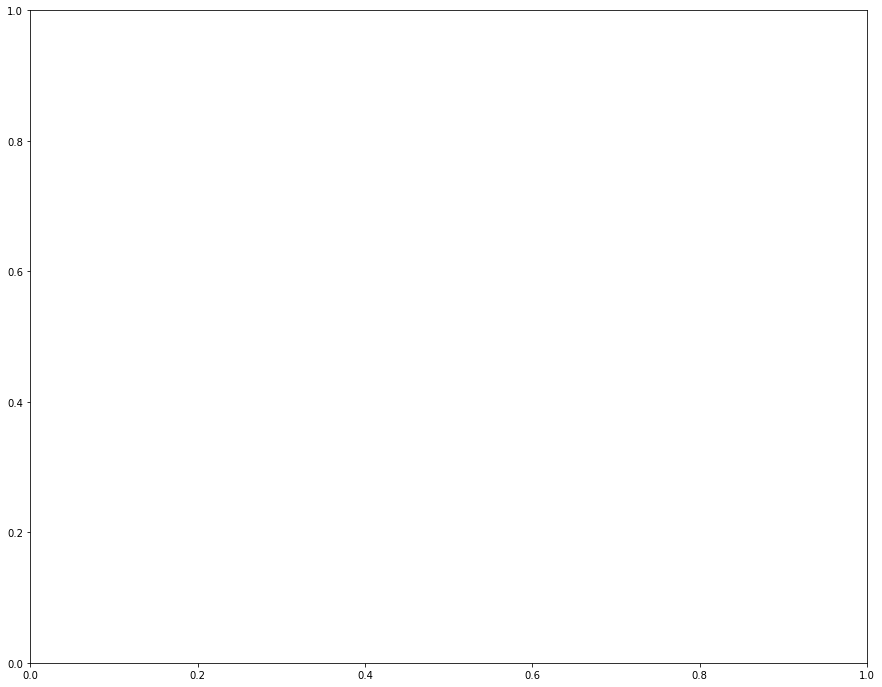

In [54]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot()
#plt.scatter(df1["num1"], df1["num2"], c = df1["years"], s = 19*df1["years"], alpha = 0.5, cmap='viridis_r')